In [198]:
###Filipino Student Employability Predictor###

In [199]:
#Import dataset and libraries here
import pandas as pd
import numpy as np

np.random.seed(321)
data = pd.read_excel('../data/Student-Employability-Datasets.xlsx')
data = data.drop("Name of Student", axis=1)
data

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable
3,3,3,3,2,3,3,3,5,LessEmployable
4,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,Employable
2978,3,4,4,4,4,4,4,5,Employable
2979,4,5,4,5,4,4,4,5,Employable
2980,4,4,4,3,4,4,3,5,LessEmployable


In [200]:
#Preprocess/prepare dataset for training and testing here
from sklearn.model_selection import train_test_split
x = data.drop('CLASS', axis = 1)
y = data['CLASS']

# print(x)
# print(y)

#70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)
print(x_train)

      GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION   
122                    5                   5                   5  \
2900                   4                   4                   4   
2085                   5                   4                   4   
1986                   5                   5                   4   
843                    5                   5                   5   
...                  ...                 ...                 ...   
1425                   5                   5                   5   
1833                   5                   4                   5   
2847                   4                   3                   4   
124                    4                   3                   4   
2586                   5                   4                   5   

      MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS   
122                  5                5                         5  \
2900                 3                3      

In [201]:
#Normalize train and test sets for MLP
from sklearn.preprocessing import MinMaxScaler

#Sigmoid activation
#scaler = MinMaxScaler(feature_range=(0,1))

#TANH activation
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
        -0.33333333,  1.        ],
       [ 0.33333333,  0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333, -1.        ],
       [ 1.        ,  0.33333333,  0.33333333, ...,  0.33333333,
         0.33333333,  0.        ],
       ...,
       [ 0.33333333, -0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333,  1.        ],
       [ 0.33333333, -0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333,  1.        ],
       [ 1.        ,  0.33333333,  1.        , ...,  0.33333333,
         0.33333333,  0.        ]])

In [202]:
#Fit and hyperparametrize model here
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


mlp = MLPClassifier(activation='tanh')
mlp.fit(x_train,y_train)

param_grid = {'hidden_layer_sizes': [8], 'max_iter': [20000], 'learning_rate_init': [0.01],'alpha':[0.001], 'activation': ['tanh']} 
grid = GridSearchCV(mlp,param_grid,refit=True)
grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(activation='tanh'),
             param_grid={'activation': ['tanh'], 'alpha': [0.001],
                         'hidden_layer_sizes': [8],
                         'learning_rate_init': [0.01], 'max_iter': [20000]})

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 8, 'learning_rate_init': 0.01, 'max_iter': 20000}
['Employable' 'LessEmployable']
0.9039106145251397


Text(113.9222222222222, 0.5, 'true value')

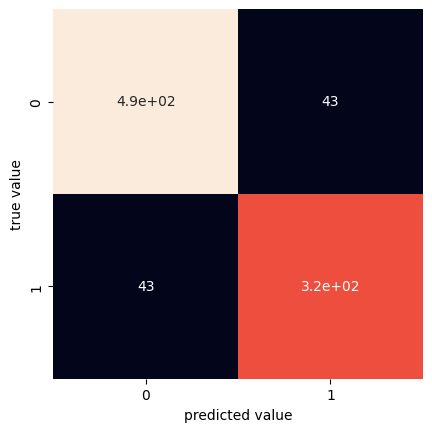

In [203]:
#Predict and display statistics of model here 
# predictions = mlp.predict(x_test)
print(grid.best_params_)
print(grid.classes_)

grid_predictions = grid.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, grid_predictions))

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, grid_predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')